# PCA clean noise

In [18]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
#print(digits.data)
print(digits.data.shape)        #(1797, 64)
print(set(digits.target.tolist()))   #{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print(digits.images.shape)      #(1797, 8, 8)      1797 pictures， 8*8 pixels  8rows 8columns

(1797, 64)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(1797, 8, 8)


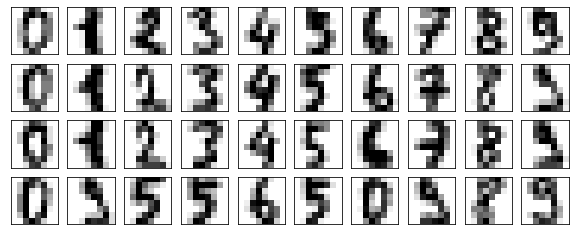

In [19]:
def plot_digits(data):
    # data frame（m,n），n have to sparate to 8*8
    fig, axes = plt.subplots(4, 10, figsize=(10, 4)         #4 rows 10 columns for the subpictures
                                                            # total 1797 pics, but I just choose 40 pics of beginning
                             , subplot_kw={"xticks": [], "yticks": []}  #no Aixs name show
                             )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap="binary")     #why not use digits.images, but data.reshape？
                                                            #because we wrap as def so reshape data
    plt.show()
    
plot_digits(digits.data)

(1797, 64)


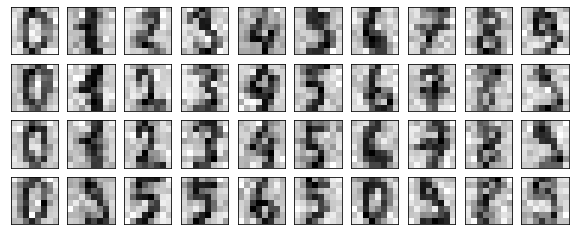

In [6]:
#  Add some noise in pictures
rng = np.random.RandomState(42)     

noisy = rng.normal(digits.data, 2)  # np.random.normal(digits.data,2)
                                  #get samples from digits.data，which is normalization and standard deviation is 2
                                    # and get it from random
#print(noisy)
print(noisy.shape)      #get the same shape of digist.data.shape（1797，,64）
                        
plot_digits(noisy)

As we can see, this picture compare with the first picture is very blurry, we can see clearly because of the noise add in the first picture to get the result.

# Decomposion

(1797, 6)
(1797, 64)


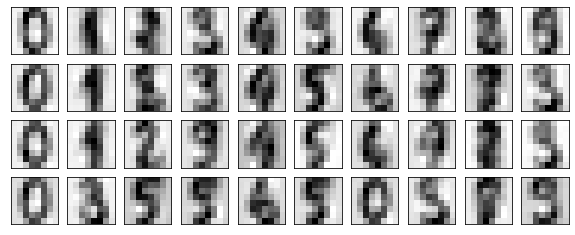

In [20]:
pca = PCA(0.5,svd_solver='full').fit(noisy) #just save 50% features data
X_dr = pca.transform(noisy)        
print(X_dr.shape)              #(1797, 6)  #the original pictures have 64 features and now reduce to 6 to save 50% features data
                                # already clean many noise
    
without_noise = pca.inverse_transform(X_dr)     #use inverse_transform to go back to the original dimension
                                        #Remember, n in def have to 64, so have to go back to 64, becasue X_dr just 6

print(without_noise.shape)    #（1797，,6）transfer to（1797，,64）
                              # feature reduce in PCA will not come back(irreversible)
                              #so just go back the same dimension but not the same amount of features
plot_digits(without_noise)

The third picture is more clearly than the second one because wem clean the noise.